## Predict the percentage of Student based on the number of Study hours

### - by Vikram Krishna

### Step-1 : Load the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Step-2: Load the dataset into a dataframe

In [2]:
data = pd.read_csv('http://bit.ly/w-data')
print('Data is imported successfully')

data.head()

Data is imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### STEP - 3 : EDA (Exploratory Data Analysis)

As we can see from info , we can say that there are no null values in our dataframe. So, it is fully consistent adn there is no missing data. And we also dont have any categorical data as both the columns have numerical data. So there is no data cleaning required to perform on this dataframe.

### Lets check the statistics of the dataframe by using " describe "

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Now we need to check if there are any outliers are present in the dataframe. For that we can use boxplots, Histograms and scatter plots, as they will highlight the outliers.

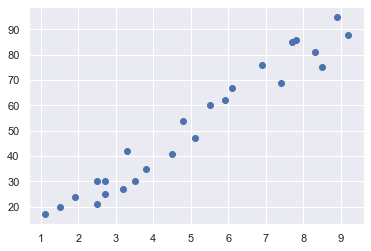

In [5]:
plt.scatter(x='Hours',y='Scores', data = data)

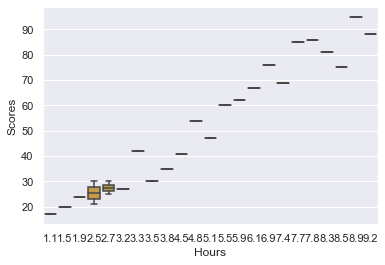

In [6]:
sns.boxplot(x='Hours',y='Scores', data = data)

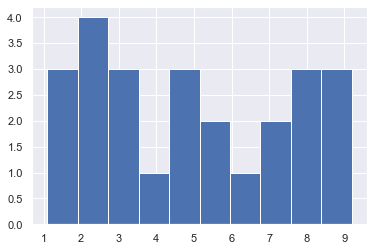

In [7]:
plt.hist(data['Hours'], bins=10)
plt.show()

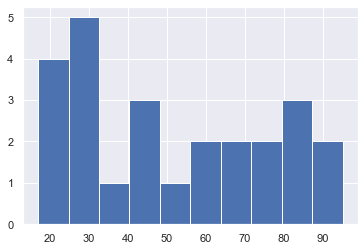

In [8]:
plt.hist(data['Scores'], bins=10)
plt.show()

As we can see from above all graphs, there are no outliers detected.

## STEP - 4 : LINEAR REGRESSION
### Declare inputs and outputs

In [9]:
#x = data['Scores']
#y = data['Hours']

X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values

In [10]:
np.reshape(Y,(25,))

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [11]:
np.reshape(X,(25,))

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

### Now we need to explore the data.
We have already performed scatterplot on the dataframe. We need to do it again to find the relation between the variables of dataframe

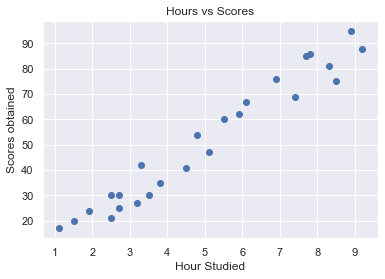

In [12]:
plt.scatter(x='Hours',y='Scores', data = data)
plt.title('Hours vs Scores')
plt.xlabel('Hour Studied')
plt.ylabel('Scores obtained')
plt.show()

From the above graph, we can say that Scores are increasing gradually as number of hours studied increasing. So we can say that they are in a linear relation

Now we need to split the data to train and test. Generally we can take the test size as 30 or 20. Keep test-size as 30 and 20 and find which one is best

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

### Training the model

In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,Y_train)
print('Training the model is successful')

Training the model is successful


### Estimating the Training prediction

In [15]:
y_hat = reg.predict(X_train)
#y_train should match y_hat then we can say our prediction is successful

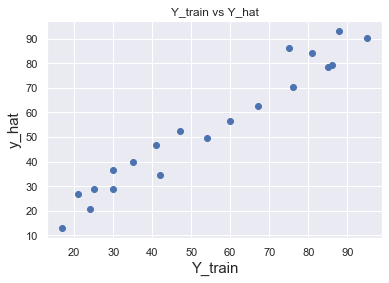

In [16]:
plt.scatter(Y_train,y_hat)
plt.title('Y_train vs Y_hat')
plt.xlabel('Y_train', size = 15)
plt.ylabel('y_hat', size = 15)
plt.show()

Text(0.5, 1.0, 'residual PDF')

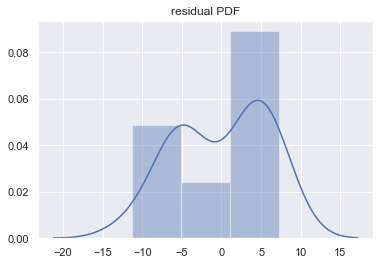

In [17]:
sns.distplot(Y_train-y_hat)
plt.title("residual PDF")

In [18]:
reg.score(X_train,Y_train)

0.9515510725211553

#### Finding weights and bias(Intercept and coeff)

In [19]:
reg.intercept_

2.018160041434683

In [20]:
reg.coef_

array([9.91065648])

### Testing the model

In [21]:
y_hat_test = reg.predict(X_test)

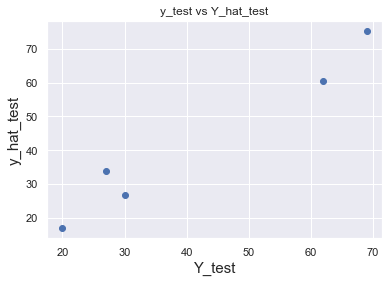

In [22]:
plt.scatter(Y_test, y_hat_test)
plt.title('y_test vs Y_hat_test')
plt.xlabel('Y_test', size = 15)
plt.ylabel('y_hat_test', size = 15)
plt.show()

### Comparing actual and predicted values

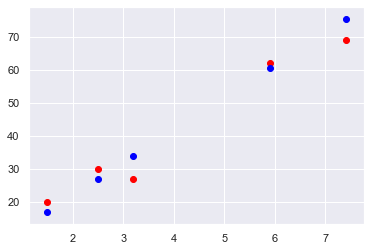

In [23]:
plt.scatter(X_test,Y_test, color = 'red')
plt.scatter(X_test,y_hat_test, color ='blue')

plt.show()

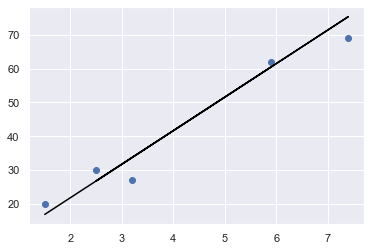

In [24]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,y_hat_test,color = 'black')

plt.show()

In [25]:
# Comparing Actual vs Predicted
df_compare = pd.DataFrame({'Actual': Y_test, 'Predicted': y_hat_test})  
df_compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [26]:
#Calculating residuals
df_compare['residual'] = df_compare['Actual'] - df_compare['Predicted']
df_compare

,Actual,Predicted,residual
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


In [27]:
#difference%
df_compare['difference%']=np.absolute(df_compare['residual']/df_compare['Actual']*100)
df_compare

,Actual,Predicted,residual,difference%
0,20,16.884145,3.115855,15.579276
1,27,33.732261,-6.732261,24.934299
2,69,75.357018,-6.357018,9.213070
3,30,26.794801,3.205199,10.683996
4,62,60.491033,1.508967,2.433817


In [28]:
df_compare.describe()

,Actual,Predicted,residual,difference%
count,5.000000,5.000000,5.000000,5.000000
mean,41.600000,42.651852,-1.051852,12.568892
std,22.255336,24.407192,5.061173,8.359124
min,20.000000,16.884145,-6.732261,2.433817
25%,27.000000,26.794801,-6.357018,9.213070
50%,30.000000,33.732261,1.508967,10.683996
75%,62.000000,60.491033,3.115855,15.579276
max,69.000000,75.357018,3.205199,24.934299


Now testing with our own data

What will be the score if student studied 9.25 hrs/day?

In [29]:
hours = 9.25
predicted_score = reg.predict(np.array(hours).reshape(1,1))
print(' \033[1;30m Answer: The score of the student if he studies for {}hrs/day is \033[1;32m {} '.format(hours,*predicted_score))

  Answer: The score of the student if he studies for 9.25hrs/day is  93.69173248737538 


### STEP - 5 : Evaluating the model
We can choose any of the available metrics, here we choose mean square error. This step is a concluding step of our regression process and is important to compare various algorithms performed on the same dataset

In [30]:
from sklearn import metrics
print('Mean Squared error:',
      metrics.mean_absolute_error(Y_test, y_hat_test))

Mean Squared error: 4.183859899002975


Mean Squared error: 4.183859899002975
With test_size as 0.3 we are getting mean squared error as 4.419

With test_size s 0.2 we are getting mean squared error as 4.183

So we need to choose the model which gives less mean squared error.

## END OF TASK